# Vetores

Vetores em Julia são representados por objetos Array unidimensionais. Um vetor é construído fornecendo a lista de elementos entre colchetes, com os elementos separados por vírgulas ou ponto e vírgula. O operador de atribuição  =  é usado para dar um nome ao array.

In [299]:
x = [-1.1, 0.0, 3.9, -7.2, 1000000, 0001, 98]

7-element Vector{Float64}:
 -1.1
  0.0
  3.9
 -7.2
  1.0e6
  1.0
 98.0

In [300]:
length(x) # A função length retorna o tamanho (dimension) de x.

7

In [302]:
y = [-1.1; 0.0; 3.6; -7.2] # Usando ponto-e-vírgula

4-element Vector{Float64}:
 -1.1
  0.0
  3.6
 -7.2

In [303]:
length(y)

4

**Observação** Não se esqueça das vírgulas ou ponto e vírgula entre as entradas e certifique-se de usar colchetes para definir vetores.

In [201]:
a = [ 1, 2 ] # a é um vetor linha
b = ( 1, 2 ) # b é uma tupla ou lista que consiste em dois escalares

(1, 2)

**Indexação.** Um elemento específico $x_i$ é recuperado pela expressão ```x[i]``` onde ```i``` é o índice (que vai de 1 a $n$, para um $n$-vetor). A indexação de matriz também pode ser usada no lado esquerdo de uma atribuição, para alterar o valor de um elemento específico.

In [306]:
x = [ -3.1, 0.2, 4.6, -49.8, 2024.1 ];
x[2]

0.2

In [307]:
x[3] = 100.5
x

5-element Vector{Float64}:
   -3.1
    0.2
  100.5
  -49.8
 2024.1

In [309]:
x[end] # O índice especial end refere-se ao último índice do vetor x
x[length(x)] # x[length(x)] fornecem a última entrada de x

2024.1

**IMPORTANTE: Atribuição X Cópia**. Em Julia, se ```x``` for um array a atribuição ```y = x``` dá um novo nome (ou referência) ```y``` ao *mesmo* o array já referenciado por ```x```. Ele não cria uma nova cópia do array ```x```.

In [311]:
x = [ -3.1, 0.2, 4.6, -49.8, 45.1 ]
y = x
x[4] = 10000000.0
y #A atribuição a x[4] também altera y[4]

5-element Vector{Float64}:
 -3.1
  0.2
  4.6
  1.0e7
 45.1

In [313]:
y[1] = 2023.3
x

5-element Vector{Float64}:
 2023.3
    0.2
    4.6
    1.0e7
   45.1

Para criar uma nova cópia de um array, deve-se utilizar a função ```copy```.

In [314]:
x = [ -3.1, 0.2, 4.6, -49.8, 45.1 ];
y = copy(x)
x[3] = 2023.355555555
y

5-element Vector{Float64}:
  -3.1
   0.2
   4.6
 -49.8
  45.1

In [315]:
y[1] = 2000000.0
x

5-element Vector{Float64}:
   -3.1
    0.2
 2023.355555555
  -49.8
   45.1

**Igualdade vetorial.** A igualdade de vetores é verificada usando o operador relacional ```==```. Para dois vetores (arrays) ```a``` e ```b```, a expressão  ```a==b``` é avaliada como ```true``` se os vetores (arrays) são iguais, *i.e.*, eles têm o mesmo tamanho e entradas idênticas, e ```false``` caso contrário.

In [316]:
x = [ -3.1, 0.2, 4.6, -49.8, 45.1 ];
y = copy(x)
y[3] = 40004.0
z = copy(x)
z == x

true

In [317]:
z = x
z[3] = 2023.0
z == x

true

**Observação: Escalares X vetores em $\mathbb{R}^1$.** Na notação matemática, um vetor em $\mathbb{R}^1$ é igual a um escalar. Mas em Julia, vetores em $\mathbb{R}^1$ não são o mesmo que escalares.

In [318]:
x = [3.14]

1-element Vector{Float64}:
 3.14

In [319]:
y = 3.14

3.14

In [320]:
x == y

false

In [321]:
x[1] == y # x[1] é a primeira (e única) entrada de x, que é de fato o número 3.14.

true

**Vetores de blocos ou empilhados.** 

In [323]:
x = [ 1,-2];
y = [1,1,0.0];
z = [x ; y] # Concatenando usando ponto e vírgula

5-element Vector{Float64}:
  1.0
 -2.0
  1.0
  1.0
  0.0

In [324]:
z = vcat(x,y) # usando vcat (concatenação vertical) 

5-element Vector{Float64}:
  1.0
 -2.0
  1.0
  1.0
  0.0

**Observação:**  ```z = (x,y)``` cria uma lista ou tupla dos dois vetores; ```z = [x,y]``` cria uma matriz dos dois vetores. Ambas são expressões válidas do Julia, mas nenhuma delas é o vetor empilhado ```[x;y]```.

**Subvetores e divisão:** A expressão ```r:s``` denota o intervalo do índice $r, r + 1,...,s$. (onde  ```r``` e ```s``` são inteiros positivos com ```r``` o menor dos dois.) Usamos $x[r:s] $ para denotar a fatia do vetor $x$ do índice $r$ para $s$.

In [325]:
x = [20, 56, 10, -100, 2023, 200, -1, 33]
y = x[2:5] # Extraimos um subvetor do vetor x usando um intervalo de índices como argumento.

4-element Vector{Int64}:
   56
   10
 -100
 2023

In [326]:
x[6:7] = [10, 100]; # Reatribuimos os valores das entradas 6 e 7 de x 
x

8-element Vector{Int64}:
   20
   56
   10
 -100
 2023
   10
  100
   33

**Indexando em arrays.** Podemos usar um intervalo de números com um terceiro argumento, que dá o passo, que é o incremento entre índices sucessivos. 

**Exemplo:** o intervalo de índices ```1:2:5``` é a lista de números ```1,3,5```. A expressão ```x[1:2:5]``` extrai o vetor em $\mathbb{R}^3$ ```[20, 10, 2023]```, i. e., as entradas $x[1]$, $x[3]$ e $x[5]$ de $x$ definidas acima. 

Também podemos usar um intervalo de índices que é executado para trás. Para qualquer vetor ```z```, a expressão  ```z[end:-1:1]``` é o vetor reverso, ou seja, o vetor com os mesmos coeficientes, mas em ordem oposta.

**Vetor das diferenças:** Construiamos o vetor $d \in \mathbb{R}^{(n-1)}$  definido por $d_i = x_{i+1} - x_i$ para $i = 1,...,n - 1 $, onde $x \in \mathbb{R}^n$. O vetor $d$ é dito de vetor das (primeiras) diferenças de $x$.
$$
d =\begin{bmatrix} d_{1}\\
d_2\\
\vdots\\
d_i\\
\vdots\\
d_{n-1}\end{bmatrix} =
\begin{bmatrix} x_{2} - x_1\\
x_{3} - x_2\\
\vdots\\
x_{i+1} - x_i\\
\vdots\\
x_{n} - x_{n-1}\end{bmatrix}
$$

In [327]:
x = [10, 100,1000,-1, -34];
d = x[2:end] - x[1:end-1]

4-element Vector{Int64}:
    90
   900
 -1001
   -33

**Lista de vetores.** Uma lista ordenada de vetores em $\mathbb{R}^n$ pode ser denotada como $a_1,...,a_k$ ou $a^{(1)},...,a^{(k)}$ ou apenas como $a,b,c$. 

In [328]:
x = [1.0, 0]; y = [1.0,-1.0]; z = [0,1.0];
lista = [x,y,z]  # formamos uma matriz unidimensional de vetores.

3-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [1.0, -1.0]
 [0.0, 1.0]

In [330]:
lista[3] #Segundo elemento da lista

2-element Vector{Float64}:
 0.0
 1.0

In [222]:
lista = (x,y,z) # Se usamos parênteses obtemos uma tupla ou lista

([1.0, 0.0], [1.0, -1.0], [0.0, 1.0])

In [223]:
lista[3] # Usamos Para extrair o i-ésimo vetor da lista de vetores, use lista[i].

2-element Vector{Float64}:
 0.0
 1.0

**Observação:** Para extrair o $i$-ésimo vetor da lista de vetores, use ```lista[i]```. Para obter o $j$-ésimo elemento do $i$-ésimo vetor na lista, use ```lista[i][j]```.

## Vetores zero ##

In [224]:
zeros(7) # a funçao zeros(n) Cria um vetor zero de dimensão $n$

7-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [225]:
zeros(length(x)) # cria um vetor zero com o mesmo tamanho do vetor x

2-element Vector{Float64}:
 0.0
 0.0

**Vetores unitários**. Não há nenhuma função interna de Julia para criar $e_i$, o $i$-ésimo vetor unitário de comprimento $n$. 

In [226]:
# Criamos $e_i$, com $i = 2$ e $n = 4$
i = 2; n = 4;
ei = zeros(n); #Cria um vetor zero
ei[i] = 1; #Defina a entrada i para 1
ei

4-element Vector{Float64}:
 0.0
 1.0
 0.0
 0.0

Outra forma de criar $e_i$ usando concatenação

In [227]:
vetor_unit(i,n) = [zeros(i-1); 1; zeros(n-i)]   # Criamos eᵢ usando concatenação

vetor_unit (generic function with 1 method)

In [333]:
vetor_unit(1,100)

100-element Vector{Float64}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

## Vetor de $1$'s
Um vetor de uns de dimensão $n$, denotado $\textbf1_n$ ou apenas $\textbf1$, é criado usando ```ones(n)```.

In [229]:
ones(3)

3-element Vector{Float64}:
 1.0
 1.0
 1.0

## Vetores aleatórios

In [230]:
rand(3) # gera um vetor aleatório de comprimento 3 com entradas que estão entre 0 e 1

3-element Vector{Float64}:
 0.019379823241796323
 0.9435914527768473
 0.14553581839975416

In [231]:
randn(3) # gera um vetor aletório de comprimento 3 com entradas que vêm de uma distribuição normal

3-element Vector{Float64}:
  0.0008566597850246244
 -0.30054460485413953
  1.1843398527864206

## Plotagem
Existem vários pacotes externos para criar gráficos no Julia. Um desses pacotes é Plots.jl.


In [232]:
using Plots # Importando o pacote para plotar

In [233]:
temps = [33.9, 34.1, 34.1, 33.9, 33.5, 32.8, 31.6, 31.2, 32.4, 32.8, 34.3, 33.5];
meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12];

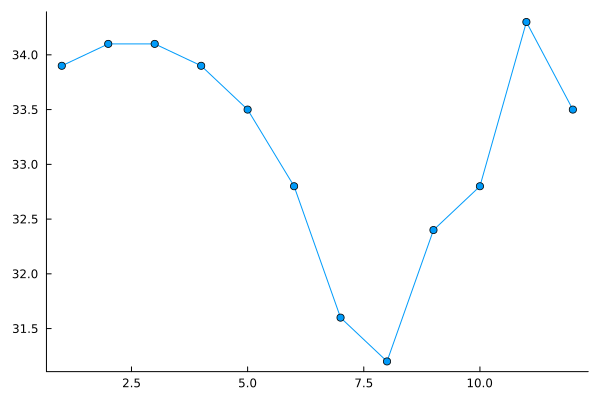

In [234]:
plot(meses,temps, marker = :circle, legend = false, grid = false)
# savefig("exemplo.pdf")

**Figura** Exemplo de plotar 2 vetores

## Adição e substração de vetores

In [235]:
[0, 7, 3] + [1, 2, 0] #Vetor soma

3-element Vector{Int64}:
 1
 9
 3

In [236]:
[1,9] - [1,1] #Vetor subtração

2-element Vector{Int64}:
 0
 8

## Multiplicação escalar-vetor

**Multiplicação e divisão escalar-vetor:** 

In [237]:
x = [0, 2, -1]
2.2*x, x*2.2 #multiplicação escalar-vetor

([0.0, 4.4, -2.2], [0.0, 4.4, -2.2])

In [238]:
x/3, 3\x #Divisão escalar-vetor

([0.0, 0.6666666666666666, -0.3333333333333333], [0.0, 0.6666666666666666, -0.3333333333333333])

**Adição escalar-vetor:**

In [239]:
[1.1, -3.7, 0.3] .- 1.4 #Substração vetor-escalar

3-element Vector{Float64}:
 -0.2999999999999998
 -5.1
 -1.0999999999999999

In [240]:
0.7 .+ [1, -1] # realizando escalar-adição com o escalar à esquerda

2-element Vector{Float64}:
  1.7
 -0.30000000000000004

**Operações elemento a elemento.** 
Podemos realizar uma operação em cada elemento ou coeficiente de um vetor. Para isso, adicionamos um ponto (```.```) antes do operador. Por exemplo, se x e y são vetores, então ```x.*y, x./y, x.\y, x.^y``` são operações vetor-vetor elemento a elemento. Eles resultam em vetores do mesmo comprimento que $x$ e $y$, onde o  $i$-esimo elemento são $x_i*y_i$, $x_i/y_i$, $y_i/x_i$ e $x_i^{y_i}$, respectivamente.


In [241]:
x = [ 22.15, 89.32, 56.77 ];
y = [ 23.05, 87.32, 57.12 ];
z = (y - x) ./ x

3-element Vector{Float64}:
  0.04063205417607233
 -0.02239140170174653
  0.006165228113440097

**Operações elementares com um escalar:** Se ```a``` é um escalar e ```x``` é um vetor então ```x.^a``` é um vetor com $i$-ésimo elemento ${x_i}^{a}$, e ```a .^x``` é um vetor com elementos $a^{x_i}$.

Também podemos usar a notação de ponto com uma função que tenha um nome, para informar a Julia que a função deve ser aplicada elemento a elemento. Nesse caso, adicionamos o ponto *depois* do nome da função para indicar que ela deve ser aplicada elemento a elemento. 

**Exemplo:** Se ```x``` é um vetor, podemos formar ```sin.(x)``` para aplicar a função $seno$ a cada elemento de ```x```.

In [242]:
x
sin.(x)

3-element Vector{Float64}:
 -0.1581841970713881
  0.9768929803388944
  0.21952955414664974

O operador de teste de igualdade ```==``` (e outros operadores relacionais como ```<```,```>=```) pode funcionar elemento a elemento precedendo-o com um ponto: ```x == y``` nos diz se ```x``` e ```y``` são ou não o mesmo vetor; ```x.==y``` é um vetor cujas entradas nos dizem se as entradas correspondentes em ```x``` e ```y``` são iguais.

In [243]:
w = [1,2,2]; z = [1,2,3]
w == z
w .== z

3-element BitVector:
 1
 1
 0

Podemos combinar isso para extrair o subvetor de entradas que satisfaçam alguma condição lógica.

In [244]:
x = [1.1, 5.5, -2.5, -0.3]

4-element Vector{Float64}:
  1.1
  5.5
 -2.5
 -0.3

In [245]:
x[abs.(x) .> 2] # dá o subvetor de ```x``` consistindo em entradas maiores que $2$ em valor absoluto.

2-element Vector{Float64}:
  5.5
 -2.5

A notação de ponto também funciona com atribuição, permitindo atribuir várias entradas de um vetor a um valor escalar.

In [246]:
x = rand(4)

4-element Vector{Float64}:
 0.5840168285859942
 0.9689060563937293
 0.6422329821827639
 0.19186809349306855

In [247]:
x[1:2] = [1, -1]
x

4-element Vector{Float64}:
  1.0
 -1.0
  0.6422329821827639
  0.19186809349306855

In [248]:
x[2:3] .= π
x

4-element Vector{Float64}:
 1.0
 3.141592653589793
 3.141592653589793
 0.19186809349306855

## Combinação linear:

In [334]:
a = [1, 2]; b = [ 3, 4]
α = -0.5; β = 1.5; 
c = α*a + β*b  # combinação linear

2-element Vector{Float64}:
 4.0
 5.0

A seguinte função usa uma lista de coeficientes e uma lista de vetores como seus argumentos e retorna a combinação linear. As listas podem ser representadas por tuplas ou arrays.

In [250]:
function comblinear(coef,vetores)
    n = length(vetores[1]) # tamanho dos vetores
    a = zeros(n)
    for i = 1:length(vetores)
        a = a + coef[i] * vetores[i];
    end
    return a
end

comblinear (generic function with 1 method)

In [251]:
comblinear((-1.5,2.5), ([2,3], [4,5]))

2-element Vector{Float64}:
 7.0
 8.0

Otra forma de escrever a mesma função é:

In [252]:
function comblinear(coef,vetores)
    return sum(coef[i] * vetores[i] for i = 1:length(vetores))
end

comblinear((-1.5,2.5), ([2,3], [4,5]))

2-element Vector{Float64}:
 7.0
 8.0

## Verificando propriedades.

Vamos verificar a propriedade distributiva

$$\alpha(u+v) = \alpha u+\alpha v, \qquad \forall\alpha \in \mathbb{R},\,\forall u,v \in \mathbb{R}^n$$



In [253]:
u = rand(3)
v = rand(3)
alfa = randn()
u,v,alfa

([0.7360179272117433, 0.30563558936822566, 0.4462947399094813], [0.22032689516853876, 0.5926715701469955, 0.49450767167380427], 1.2924982839322676)

In [254]:
esquerda = alfa*(u+v)

3-element Vector{Float64}:
 1.236074041774024
 1.1610604621174931
 1.2159855024907356

In [255]:
direita = alfa*u + alfa * v

3-element Vector{Float64}:
 1.236074041774024
 1.1610604621174931
 1.2159855024907356

In [256]:
esquerda == direita

true

Embora os vetores esquerda e direita sejam exibidos como iguais, eles podem não ser exatamente iguais, devido a erros de arredondamento muito pequenos em cálculos de ponto flutuante.

# Produto Interno

O produto interno dos vetores $x$ e $y$ é denotado como $x^Ty$. Em Julia, o produto interno de ```x``` e ```y``` é denotado como ```x'*y```.

In [257]:
x = [-1, 2,2];
y = [1, 0, -3];
x'*y

-7

## Exemplo: População total em idade escolar.

Suponha que o vetor  $ x\in \mathbb{R}^{100}$ forneça a distribuição etária de alguma população, com $x_i$ sendo o número de pessoas com a idade ```i-1```, para $i = 1,\ldots,100$. 

O número total de pessoas com idade entre $5$ e $18$ anos(inclusive) é dado por $x_6+x_7+...+x_{18}+x_{19}$. Podemos expressar isso como $s^T x$, onde $s$ é o vetor com entradas para ```i = 6,...,19``` e zero caso contrário. Em Julia, isso é expresso como

In [258]:
s = [zeros(5); ones(14); zeros(81)];
x_idades = [rand(5:18) for i = 1:100];

Pop_idade_escolar = s'*x_idades

166.0

Note que, outras expressões podem ser usadas para calcular essa quantidade, por exemplo, a expressão ```sum(x[6:19])```.

In [259]:
sum(x_idades[6:19])

166

# Observação sobre os cálculos no computador
**Operadores de ponto flutuante**. Sabemos que

$$(a+b)(a-b) = a^2-b^2 \qquad \forall \, a, b\in \mathbb{R}.$$

Quando um computador calcula o lado esquerdo e o lado direito, para números específicos $a$ e $b$, estes não precisam ser exatamente iguais, devido a erros de arredondamento de ponto flutuante muito pequenos. Mas eles devem ser quase iguais.

In [260]:
a = rand();
b = rand();
esquerda = (a+b) * (a-b)

0.6661647491052783

In [261]:
direita = a^2 - b^2

0.6661647491052783

In [262]:
esquerda - direita

0.0

Aqui vemos que os lados esquerdo e direito não são exatamente iguais, mas muito próximos.

## Complexidade: 
Podemos cronometrar em Julia adicionando ```@time``` antes do comando. O cronômetro não é muito preciso para tempos muito pequenos, digamos, medidos em microssegundos $(10^{-6} segundos)$. Além disso, devemos executar o comando mais de uma vez; pode ser muito mais rápido nas execuções subsequentes.

In [263]:
a = randn(10^5); b = randn(10^5)
@time a'*b

  0.006193 seconds (2 allocations: 32 bytes)


300.1986520820708

In [264]:
@time a'*b

  0.000414 seconds (2 allocations: 32 bytes)


300.1986520820708

In [265]:
c = randn(10^6); d = randn(10^6)
@time c'*d

  0.001032 seconds (2 allocations: 32 bytes)


-298.0697977978739

In [266]:
@time c'*d

  0.000998 seconds (2 allocations: 32 bytes)


-298.0697977978739

O primeiro produto interno, de um vetor de comprimento $10^5$, leva cerca de $0,00017$ segundos; o segundo, com vetores de comprimento $10^6$ (dez vezes maior), o produto leva cerca de $0,0018$ segundos, cerca de $10$ a mais. Isso é previsto pela complexidade do produto interno, que é $2n-1$ flops. 

O computador no qual os cálculos foram feitos é capaz de cerca de $2\times10^6/0.001765$ flops por segundo, ou seja, cerca de $1$ Gflop/s. Esses tempos e a estimativa da velocidade do computador são muito aproximados.

## Vetores esparsos: 
As funções para criar e manipular vetores esparsos estão contidas no pacote SparseArrays do Julia, então você precisa instalar este pacote antes de poder usá-los.

Os vetores esparsos são armazenados como arrays esparsos, ou seja, arrays nos quais apenas os elementos diferentes de zero são armazenados. Em Julia você pode criar um vetor esparso a partir de listas de índices e valores usando a função ```sparsevec```. Você também pode primeiro criar um vetor esparso de zeros (usando ```spzeros(n)```) e então atribuir valores às entradas diferentes de zero. Um vetor esparso pode ser criado a partir de um vetor não esparso usando ```sparse(x)```, que retorna uma versão esparsa de ```x```. ```nnz(x)``` dá o número de elementos diferentes de zero de um vetor esparso. Os vetores esparsos são sobrecarregados para funcionar como você imagina; por exemplo, todas as operações vetoriais usuais funcionam e são automaticamente reformuladas como vetores não esparsos quando apropriado.

In [267]:
using SparseArrays #Para manipular vetores esparsos

In [268]:
a = sparsevec([123456, 123457],[1.0,-1.0], 10^6) #  cria um vetor esparso a partir de listas de índices e valores

1000000-element SparseVector{Float64, Int64} with 2 stored entries:
  [123456]  =  1.0
  [123457]  =  -1.0

In [269]:
length(a)

1000000

In [270]:
nnz(a) # número de elementos diferentes de zero de um vetor esparso

2

In [271]:
b = randn(10^6) #Um ordinario (vetor não-esparso)
@time 2*a #Calculado de forma eficiente!

  0.000021 seconds (3 allocations: 192 bytes)


1000000-element SparseVector{Float64, Int64} with 2 stored entries:
  [123456]  =  2.0
  [123457]  =  -2.0

In [272]:
@time 2*b

  0.004571 seconds (2 allocations: 7.629 MiB)


1000000-element Vector{Float64}:
  2.7352611013509107
 -0.02879177202803458
  0.43286797970589524
 -0.5212172875462645
 -0.7557560091310106
  1.1358473952809556
 -1.1560086356524868
 -1.4665250994607395
 -2.871394543583866
 -2.206489617520944
 -2.823371410592644
  1.2660196448762988
  0.10131225662038508
  ⋮
  3.038739843895814
 -2.5884006845324907
 -1.9159444376065642
  1.6222399553591587
  0.9824863765961261
  0.8120472149803845
  2.7777083412357833
 -1.0701386270210558
  1.275947216574459
  0.4055504312164751
 -1.068078354866941
  0.5728313040915075

In [273]:
@time a'*b

  0.000012 seconds (2 allocations: 48 bytes)


0.8838761564726005

In [274]:
@time b'*b

  0.000498 seconds (2 allocations: 32 bytes)


998476.6832812866

In [275]:
@time c = a + b

  0.040414 seconds (15 allocations: 30.518 MiB, 24.30% gc time)


1000000-element SparseVector{Float64, Int64} with 1000000 stored entries:
  [1      ]  =  1.36763
  [2      ]  =  -0.0143959
  [3      ]  =  0.216434
  [4      ]  =  -0.260609
  [5      ]  =  -0.377878
  [6      ]  =  0.567924
  [7      ]  =  -0.578004
  [8      ]  =  -0.733263
  [9      ]  =  -1.4357
  [10     ]  =  -1.10324
             ⋮
  [999990 ]  =  -1.2942
  [999991 ]  =  -0.957972
  [999992 ]  =  0.81112
  [999993 ]  =  0.491243
  [999994 ]  =  0.406024
  [999995 ]  =  1.38885
  [999996 ]  =  -0.535069
  [999997 ]  =  0.637974
  [999998 ]  =  0.202775
  [999999 ]  =  -0.534039
  [1000000]  =  0.286416

Na última linha, o vetor esparso a é convertido automaticamente em um vetor comum (array) para que possa ser adicionado ao vetor aleatório; o resultado é um vetor (não esparso) de comprimento $10^6$.

In [276]:
using LinearAlgebra

# Norma e distancia
### Norma:
A norma $‖x‖$ em Julia é `norm(x)`.  A função `norm`  esta definida no package `LinearAlgebra`.

In [277]:
x = [ 2, -1, 2 ];
norm(x), sqrt(x'*x), sqrt(sum(x.^2))

(3.0, 3.0, 3.0)

In [278]:
norm(x, 1), # Norma 1
norm(x, Inf), # Norma infinito
norm(x, 2), #Norma Euclideana
norm(x, 4) # Norma induzida p=4

(5.0, 2.0, 3.0, 2.39678172692843)

### Desigualdade Triangular:

$$‖x+ y‖ ≤ ‖x‖+ ‖y‖\qquad \forall\, x, y \in \mathbb{R}^n$$

In [279]:
x = randn(10); y = randn(10);
esquerdo = norm(x+y)
direito = norm(x) + norm(y)
esquerdo, direito

(3.8224471160878473, 7.2395806364339)

### Exemplo: Função media em Julia

In [280]:
avg(x) = (ones(length(x)) / length(x))'*x;
x = [1, -3, 2, -1];
avg(x)

-0.25

### Distancia

A distancia entre dois vetores é ${\rm dist}(x, y) = ‖x − y‖$. Em Julia é `norm(x-y)`.

In [281]:
u = [1.8, 2.0, -3.7, 4.7];
v = [0.6, 2.1, 1.9, -1.4];
w = [2.0, 1.9, -4.0, 4.6];
norm(u-v), norm(u-w), norm(v-w)

(8.36779540858881, 0.3872983346207417, 8.532877591996735)

## Vizinho mais Proximo:
Definamos uma função que calcula o vizinho mais proximo de um vetor em uma lista de vetores.

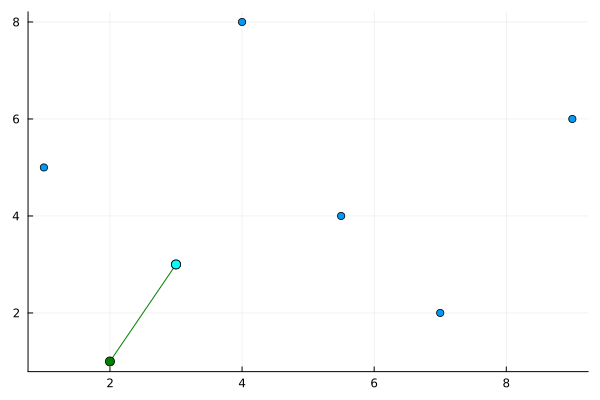

In [282]:
using Plots

z = [[2,1], [7,2], [5.5,4], [4,8], [1,5], [9,6] ] ;
scatter(Tuple.(z), marker = :circle, legend = false, grid = true, ms=4)
p = [3,3]
w = vizinho_proximo(p, z);
z1 = push!(z, p); # Inserir um ou mais itens no final da coleção.
scatter(Tuple.(z1), marker = :circle, legend = false, grid = true, ms=4)
plot!([w[1], p[1]],[w[2], p[2]], marker = :circle, legend = false, grid = true, ms=5, color=:green)
scatter!([p[1]],[p[2]], marker = :circle, legend = false, grid = true, ms=5, color=:cyan)


In [283]:
vizinho_proximo(x,z) = z[ argmin([norm(x-y) for y in z]) ];
z = ( [2,1], [7,2], [5.5,4], [4,8], [1,5], [9,6] );
vizinho_proximo([5,6], z)


2-element Vector{Float64}:
 5.5
 4.0

In [284]:
vizinho_proximo([3,3], z)

2-element Vector{Int64}:
 2
 1

Na primeira linha, a expressão `[norm(x-y) for y in z]` usa uma construção conveniente em Julia. Aqui `z` é uma lista de vetores, e a expressão expande para um array com elementos `norm(x-z[1])`, `norm(x-z[2]), . . . .` A função `argmin` aplicada a este array retorna o indice do menor elemento. 

### Angulo entre vetores

In [285]:
# Defimos a função angulo, a qual retorna radianos
ang(x,y) = acos(x'*y/(norm(x)*norm(y)));
a = [1,2,-1]; b=[2,0,-3];

[(ang(a,b),":angulo em radianos"), 
(ang(a,b)*(360/(2*pi)), ":angulo in graus")]

2-element Vector{Tuple{Float64, String}}:
 (0.9689825515916383, ":angulo em radianos")
 (55.51861062801842, ":angulo in graus")

### Vetores Ortonormais
**Expansão em uma base ortonormal:** Verifiquemos que os vetores
$$
a_1 = \begin{bmatrix} 0\\ 0\\ -1\end{bmatrix}, 
a_2 = \frac{1}{\sqrt{2}}\begin{bmatrix} 1\\ 1\\ 0 \end{bmatrix},
a_3 = \frac{1}{\sqrt{2}}\begin{bmatrix} 1\\ -1\\ 0\end{bmatrix}
$$

formam uma base ortonormal, e verifiquemos a expansão de $x = \begin{bmatrix}1\\ 2\\ 3\end{bmatrix}$ em esta base,

$$x = (a^{T}_{1} x)a_1 + · · ·+ (a^{T}_{n}x)a_n.$$

In [286]:
a1 = [0,0,-1]; a2 = [1,1,0]/sqrt(2); a3 = [1,-1,0]/sqrt(2);
norm(a1), norm(a2), norm(a3)

(1.0, 0.9999999999999999, 0.9999999999999999)

In [287]:
a1'*a2, a1'*a3, a2'*a3

(0.0, 0.0, -2.2371143170757382e-17)

In [288]:
x = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [289]:
# obtendo os coeficientes de x na base ortonormal
beta1 = a1'*x; beta2 = a2'*x; beta3 = a3'*x
# Expansão de x na base
xexp = beta1*a1 + beta2*a2 + beta3*a3

3-element Vector{Float64}:
 0.9999999999999999
 1.9999999999999996
 3.0

### O  Algoritmo de Gram–Schmidt

Consideremos como entrada um array `[ a[1], a[2], ..., a[k] ]`, contendo os $k$ vetores $a_1, . . . , a_k$. Se os vetores são  L.I., retorna um array `[ q[1], ..., q[k] ]` com o conjunto ortonormal of vetores calculado pelo algoritmo de Gram – Schmidt. Se os vetores são L.D e o algoritmo de Gram–Schmidt termina antes na iteração `i`, este retorna um array `[ q[1], ..., q[i] ]` de comprimento `i`.

In [290]:
function gram_schmidt(a; tol = 1e-10)
    
    q = []
    for i = 1:length(a)
        qtilde = a[i]
        for j = 1:i-1
            qtilde -= (q[j]'*a[i]) * q[j]
        end
        if norm(qtilde) < tol
            println("Os vetores são Linearmente Dependentes.")
            return q
        end
        push!(q, qtilde/norm(qtilde))
        end;
    return q
end

gram_schmidt (generic function with 1 method)

Na `linha 3`, initializamos o array de saida como um array vazio. Em cada iteração, adicionamos o proximo vetor ao array usando a função push! (`linha 13`).

### Exemplo:

In [291]:
a = [ [1, 0, 1], [1, 0, 0], [2, 1, 0] ]

3-element Vector{Vector{Int64}}:
 [1, 0, 1]
 [1, 0, 0]
 [2, 1, 0]

In [292]:
q = gram_schmidt(a)

3-element Vector{Any}:
 [0.7071067811865475, 0.0, 0.7071067811865475]
 [0.7071067811865477, 0.0, -0.7071067811865474]
 [-2.220446049250313e-16, 1.0, 2.220446049250313e-16]

In [293]:
a = [ [-1, 1, -1, 1], [-1, 3, -1, 3], [1, 3, 5, 7] ]

3-element Vector{Vector{Int64}}:
 [-1, 1, -1, 1]
 [-1, 3, -1, 3]
 [1, 3, 5, 7]

In [294]:
q = gram_schmidt(a)

3-element Vector{Any}:
 [-0.5, 0.5, -0.5, 0.5]
 [0.5, 0.5, 0.5, 0.5]
 [-0.5, -0.5, 0.5, 0.5]

In [295]:
# teste de ortnormalidade
[("norm(q[1]:)",norm(q[1])),
("q[1]'*q[2]:",q[1]'*q[2]),
("q[1]'*q[3]:",q[1]'*q[3]),
("norm(q[2]):",norm(q[2])),
("q[2]'*q[3]:",q[2]'*q[3]),
("norm(q[3]):",norm(q[3]))]

6-element Vector{Tuple{String, Float64}}:
 ("norm(q[1]:)", 1.0)
 ("q[1]'*q[2]:", 0.0)
 ("q[1]'*q[3]:", 0.0)
 ("norm(q[2]):", 1.0)
 ("q[2]'*q[3]:", 0.0)
 ("norm(q[3]):", 1.0)

### Exemplo de terminação antecipada:
Se subtituimos $a_3$ com a combinação linear de $a_1$, e $a_2$ o conjunto será L.D.

In [296]:
b = [ a[1], a[2], 1.3*a[1] + 0.5*a[2] ]

3-element Vector{Vector{Float64}}:
 [-1.0, 1.0, -1.0, 1.0]
 [-1.0, 3.0, -1.0, 3.0]
 [-1.8, 2.8, -1.8, 2.8]

In [297]:
q = gram_schmidt(b)

Os vetores são Linearmente Dependentes.


2-element Vector{Any}:
 [-0.5, 0.5, -0.5, 0.5]
 [0.5, 0.5, 0.5, 0.5]

### Exemplo da desigualdade de independencia-dimensão:
Sabemos que quaisquer $03$ vetores em $\mathbb{R}^2$ debem ser ${\rm L.D.}$ Usemos o algoritmo de Gram-Schmidt para verificar este fato.

In [298]:
vetores = [ [1,1], [1,2], [-1,1] ];
q = gram_schmidt(vetores)

Os vetores são Linearmente Dependentes.


2-element Vector{Any}:
 [0.7071067811865475, 0.7071067811865475]
 [-0.7071067811865471, 0.7071067811865478]